In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook
import seawater

In [3]:
P = np.arange(0,1000)
T = np.arange(0., 30., 0.1)
T,P = np.meshgrid(T, P)
rho = seawater.dens(0*T, T, P)

/Users/jklymak/matplotlib/lib/matplotlib/__init__.py:917: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


<IPython.core.display.Javascript object>


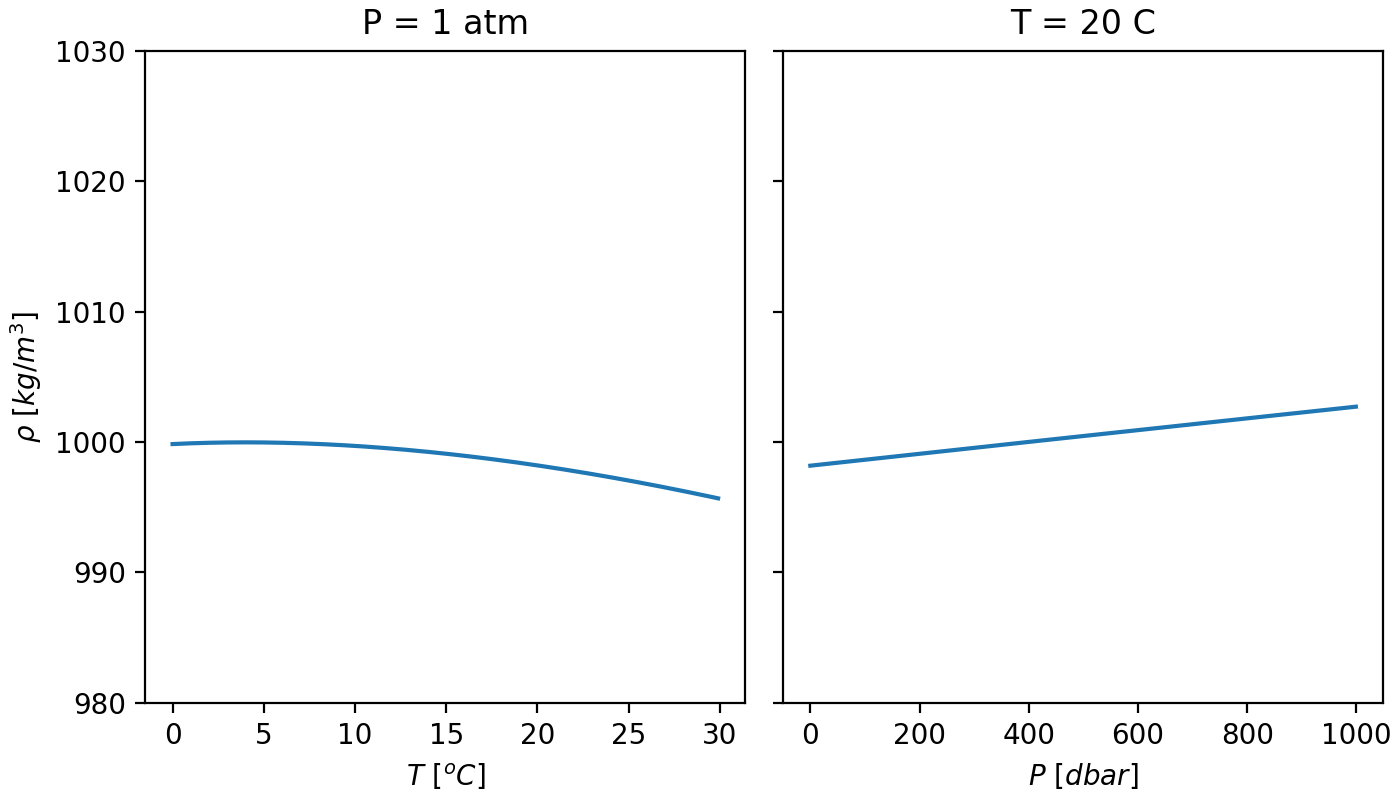

In [42]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True, figsize=(7, 4))
ax = axs[0]
ax.plot(T[0,:], rho[0,:])
ax.set_ylabel(r'$\rho\ [kg/m^3]$')
ax.set_xlabel('$T\ [^oC]$')
ax.set_ylim([980, 1030])
ax.set_title(r'P = 1 atm')

ax = axs[1]
ind = np.where(T[0,:] > 20)[0][0]
ax.plot(P[:, ind], rho[:, ind])
#ax.set_ylabel(r'$\rho\ [kg/m^3]$')
ax.set_xlabel('$P\ [dbar]$')
ax.set_ylim([980, 1030])
ax.set_title(r'T = 20 C')

fig.savefig('doc/EoS1.png', dpi=200)


/Users/jklymak/matplotlib/lib/matplotlib/__init__.py:917: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


<IPython.core.display.Javascript object>


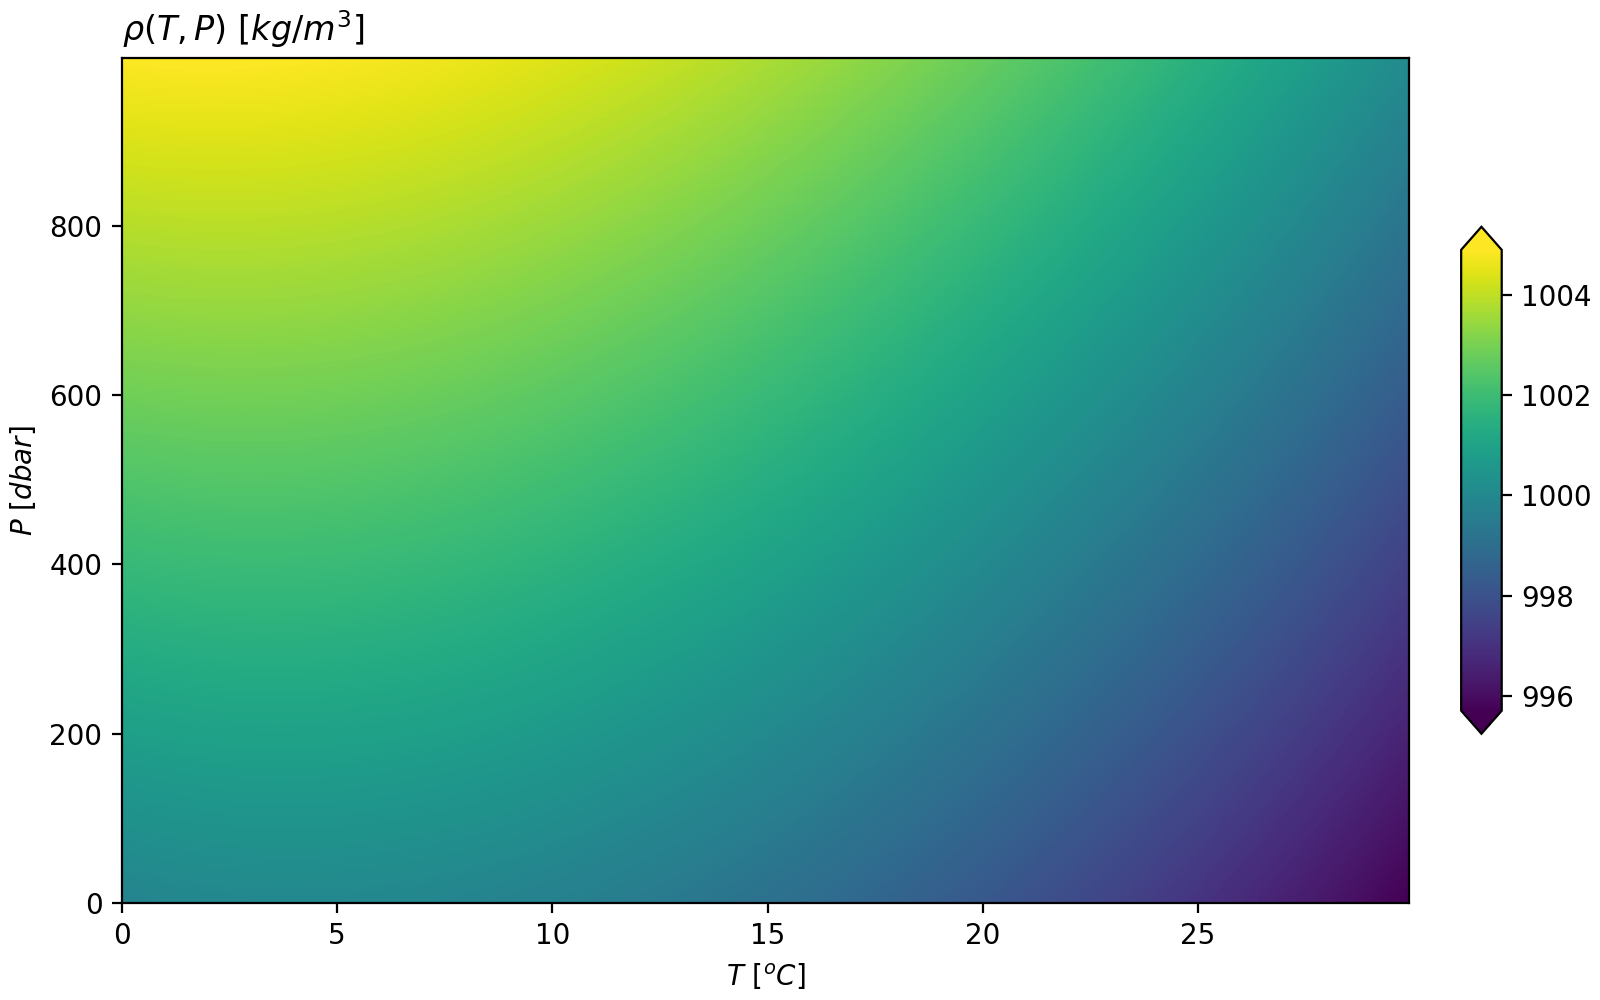

In [41]:
fig, axs = plt.subplots(constrained_layout=True, figsize=(8, 5))

pcm = axs.pcolormesh(T, P, rho, rasterized=True)
fig.colorbar(pcm, shrink=0.6, extend='both')
axs.set_xlabel(r'$T\ [^oC]$')
axs.set_ylabel(r'$P\ [dbar]$')
axs.set_title(r'$\rho(T, P)\ [kg/m^3]$', loc='left')
fig.savefig('doc/EquationOfStateCont.png', dpi=200)

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/Users/jklymak/anaconda/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
               'theme': 'serif',
              'transition': 'none',
              'start_slideshow_at': 'selected',
})
cm.update('livereveal', {
              'scroll': True,
})

{u'scroll': True,
 u'start_slideshow_at': u'selected',
 u'theme': u'serif',
 u'transition': u'none'}

In [5]:
# co-ordinates:
x = np.arange(-3.5,3.5,0.01)
y = np.arange(-2.,2.,0.01)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
Th = np.arctan2(Y,X)
Th[Th<0]=Th[Th<0]+np.pi*2.


## Airfoils and lift

Recall that around an object in an irrotational flow the lift is given by

$$L = \rho U \Gamma$$

where $U$ is the free-stream velocity, and $\Gamma$ is the circulation around the object.  

In [2]:
# airfoils:
def plotAirfoil(ax,offset=0,a=1.2,b=1.):
    th = np.arange(0.,np.pi*2,0.001)
    R=a+1j*0.
    zeta = R*np.exp(1j*th)+offset
    zetaCylinder=zeta
    Zfoil = zeta+b**2/zeta
    ax.plot(np.real(Zfoil),np.imag(Zfoil),'b')
    ax.plot(np.real(zeta),np.imag(zeta),'g')
    ax.plot(np.real(offset),np.imag(offset),'+g')
    ax.axhline(y=0.,ls='--',color='k')
    ax.axvline(x=0.,ls='--',color='k')
    ax.set_aspect(1.)
    # get beta:
    bb = np.where(np.diff(np.signbit(np.imag(zeta))))[0]
    try:
        ax.plot(np.real(zeta[bb[1]]),np.imag(zeta[bb[1]]),'s')
        ax.plot(np.real(Zfoil[bb[1]]),np.imag(Zfoil[bb[1]]),'s')
        beta = -np.arctan2(np.imag(zeta[bb[1]]-offset),np.real(zeta[bb[1]]-offset))
    except:
        beta=0.
    beta = np.arcsin(np.imag(offset)/a)
    ax.set_title(r'$\beta$'+ '= %1.2f degrees'%(beta*180./np.pi))
    return(beta,zetaCylinder,Zfoil)

## Zhukowski Airfoil

We can create an airfoil by going from the $\chi=\eta + i\zeta$ plane to the $z = x+iy$ plane using the Zhukoskwi transform:

$$ z = \zeta - \frac{b^2}{\zeta} $$

and back again using its inverse:

$$\zeta = \frac{z}{2}\pm \frac{1}{2}\left( z^2-4b^2 \right) $$

where $b$ is an arbitrary parameter.  

In [3]:
offset=-0.1+0.35*1j
#offset=0.0
fig,ax = plt.subplots(figsize=(9,5))
   
sx=widgets.FloatSlider(min=0.,max=1.,step=0.05)
sy=widgets.FloatSlider(min=0.,max=1.,step=0.05)
sa=widgets.FloatSlider(min=1.,max=2.,step=0.05)
ssx=widgets.HBox([widgets.Label('real(Q)   '),sx])
ssy=widgets.HBox([widgets.Label('imag(Q)   '),sy])
ssa=widgets.HBox([widgets.Label('radius    '),sa])
display.display(ssx)
display.display(ssy)
display.display(ssa)
offset = 0.+1j*0.
beta,zetaCylinder,zfoil = plotAirfoil(ax,offset,a=1.2)
def slideit(sender):
    global hhh
    ax.cla()
    offset = -sx.value+sy.value*1j
    beta,zetaCylinder,zfoil = plotAirfoil(ax,offset,a=sa.value)
    ax.set_xlim([-3.,3.])
    fig.show()
sx.observe(slideit)
sy.observe(slideit)
sa.observe(slideit)



<IPython.core.display.Javascript object>

NameError: name 'widgets' is not defined

In [8]:
def plotFoil(axs,gammafac=0.,alpha=0.):
    
    # co-ordinates:
    b = 1.
    a = 1.2
    offset = -0.15+1j*0.35
    x = np.arange(-4.5,3.5,0.05)
    y = np.arange(-2.,4.,0.05)
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2+Y**2)
    Th = np.arctan2(Y,X)
    Th[Th<0]=Th[Th<0]+np.pi*2.
    Z = X+1j*Y
    U=1.
    zz = (Z-offset)*np.exp(-1j*alpha*np.pi/180.)

    
    cnts=np.arange(-4.,4.,0.2)
    ax=axs[0]
    zetaCylinder = a*np.exp(1j*np.arange(0.,np.pi*2.,0.01))+offset
    bb = np.where(np.diff(np.signbit(np.imag(zetaCylinder))))[0]
    if len(bb)>1:
        beta = -np.arctan2(np.imag(zetaCylinder[bb[1]]-offset),np.real(zetaCylinder[bb[1]]-offset))
    else:   
        beta = 0.
    beta = np.arcsin(np.imag(offset)/a)
    Gamma = 4*np.pi*U*a*np.sin(alpha*np.pi/180.+beta)*gammafac
    W = U*(zz+a**2/zz)+1j/2./np.pi*np.log(zz/a)*Gamma
    W[np.abs(zz)<a]=np.NaN

    ax.contour(x,y,np.imag(W),cnts,linewidths=1.4,colors='0.2')
    ax.set_aspect(1.)
    ax.plot(np.real(zetaCylinder[bb[1]]),np.imag(zetaCylinder[bb[1]]),'s')
    ax.plot(np.real(zetaCylinder),np.imag(zetaCylinder),'b')
    xx=50.*np.exp(1j*0.*np.pi/180.)
    ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)],'--',color='0.4')
    ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)],'--',color='0.4')
    ax.plot(np.real(offset),np.imag(offset),'bx')
    # plot the equator of cylander:
    aa = a*(np.array([-1.+0.*1j,0.+0.*1j,1.+0.*1j]))*np.exp(1j*alpha*np.pi/180.)+offset
    print(aa)
    ax.plot(np.real(aa),np.imag(aa),'b')


    ax=axs[1]
    zeta = Z/2.+0.5*np.sqrt(Z**2-4*b**2)
    zeta[X<np.real(0.)] = Z[X<np.real(0.)]/2.-0.5*np.sqrt(Z[X<np.real(0.)]**2-4*b**2)
    zeta = (zeta-offset)*np.exp(-1j*alpha*np.pi/180)
    W = U*(zeta+a**2/(zeta))+1j/2./np.pi*np.log((zeta)/a)*Gamma
    W[np.abs(zeta)<a]=np.NaN
    Zfoil = zetaCylinder+b**2/zetaCylinder
    ax.plot(np.real(Zfoil),np.imag(Zfoil))
    psi = np.imag(W)
    import matplotlib
    matplotlib.rcParams['contour.negative_linestyle']='solid'
    ax.contour(x,y,psi,cnts,linewidths=1.4,colors='0.2',)
    xx=50.*np.exp(1j*alpha*np.pi/180.)
    #ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)],'--',color='0.4')
    #ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)],'--',color='0.4')

    ax.set_xlim([-2.7,x[-1]])
    ax.set_ylim([-1.,1.45])
    ax.set_aspect(1.)
    axs[0].set_title(r'$\alpha = %1.2f; \  \Gamma = %1.2f \ \beta = %1.2f$'%(alpha,Gamma,beta*180./np.pi))

<IPython.core.display.Javascript object>


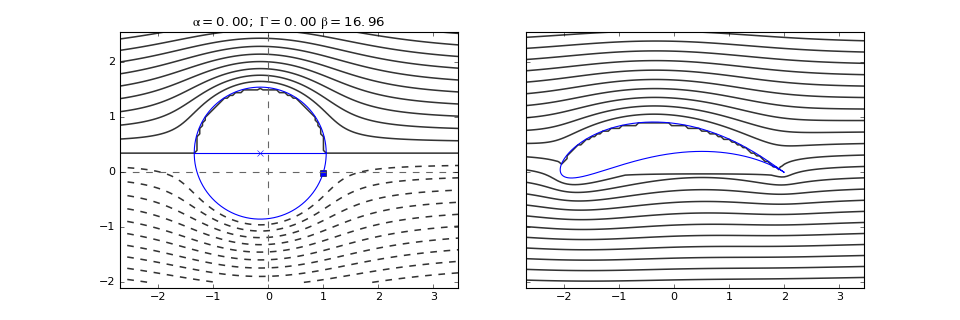

[-1.35+0.35j -0.15+0.35j  1.05+0.35j]


In [9]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))

axs=axs.flatten()

sal=widgets.FloatSlider(min=-30.,max=30.,step=2.)
sgam=widgets.FloatSlider(min=0.,max=2.,step=0.05)
ssal=widgets.HBox([widgets.Label('Angle of Attack   '),sal])
ssgam=widgets.HBox([widgets.Label('$\Gamma/\Gamma_0$   '),sgam])
display.display(ssal)
display.display(ssgam)
plotFoil(axs,gammafac=0.,alpha=0.)

def slideit2(sender):
    global hhh
    for ax in axs:
        ax.cla()
    plotFoil(axs,gammafac=sgam.value,alpha=sal.value)
    fig.show()
sal.observe(slideit2)
sgam.observe(slideit2)




## Math for stagnation point

We want the point at $\theta = \alpha+\beta$ to be a stagnation point.  We saw in class that the velocity around a cylander was given by:

$$ u_{\theta} = -2U\sin \theta - \frac{\Gamma}{2\pi a} $$

So in this case, we want to move the stagnation point from $\theta = \alpha$ down to the angle $-\beta$, so this means that 